# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/image.jpg"
import base64

with open(path, "rb") as img_file:
    b64 = base64.b64encode(img_file.read()).decode()

print(b64[:200])

UklGRsD0AABXRUJQVlA4ILT0AACw7gKdASogAx0CPpE+mUilo6KqLPnJoUASCU3KH2tV/ziu/+9JI0HOP0vno42fHByPXP0d7Zz5+P/kPJd7K/7Xqc2OPjq9Onah/+H/XfkBX+K/1l+WPyefByn4//ctTPGp76zR/h++T/3vV5/T/937B/mJ/+nsG/wvos/dH1rPUB/o


(np.float64(-0.5), np.float64(799.5), np.float64(540.5), np.float64(-0.5))

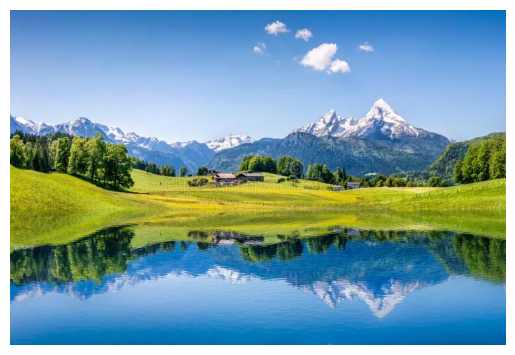

In [ ]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = b64


img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(799.5), np.float64(540.5), np.float64(-0.5))

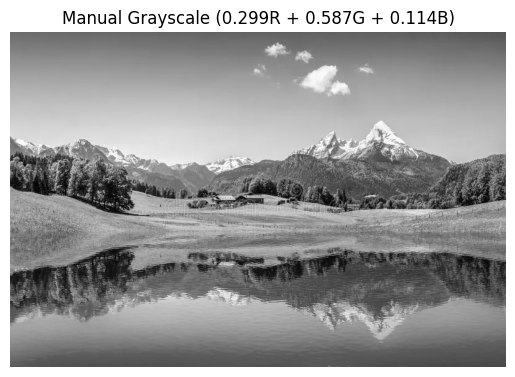

In [ ]:
img_rgb = np.array(img)   # shape (H, W, 3)

# Manual grayscale (weighted)
gray_img = (
    0.299 * img_rgb[:, :, 0] +
    0.587 * img_rgb[:, :, 1] +
    0.114 * img_rgb[:, :, 2]
).astype(np.uint8)
plt.imshow(gray_img, cmap="gray")
plt.title("Manual Grayscale (0.299R + 0.587G + 0.114B)")
plt.axis("off")


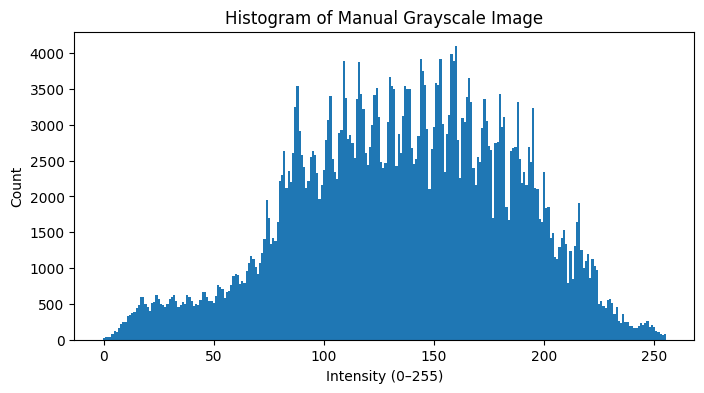

In [ ]:
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)

    h, w = gray_img.shape
    for i in range(h):
        for j in range(w):
            hist[gray_img[i, j]] += 1

    return hist

hist = gray_histogram(gray_img)

plt.figure(figsize=(8,4))
plt.bar(np.arange(256), hist, width=1)
plt.title("Histogram of Manual Grayscale Image")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Count")
plt.show()


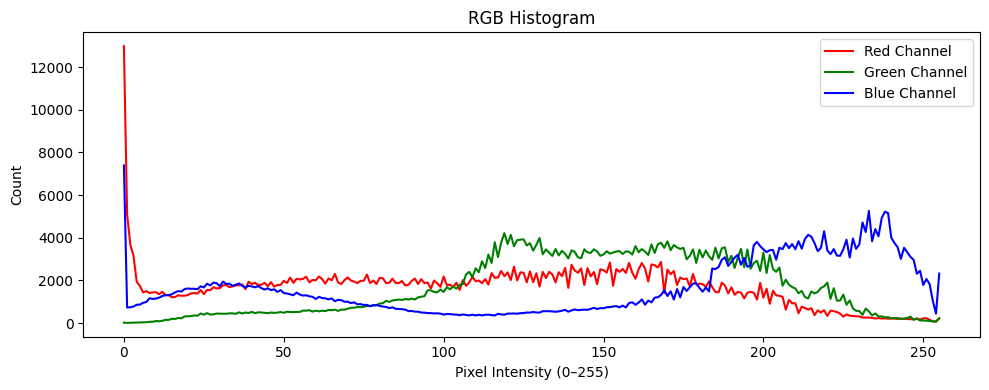

In [ ]:
import numpy as np
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt

# Using the 'b64' variable that was successfully generated in cell 6GjZq7Q7tUdM.
base64_image = b64
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

# Convert image to RGB NumPy array
img_rgb = np.array(img)   # shape (H, W, 3)

# Function to compute RGB histogram using pure lo ops

def rgb_histogram(rgb_img):
    # 3 channels → 3 histograms (each 256 bins)
    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    h, w, _ = rgb_img.shape
    for i in range(h):
        for j in range(w):
            r, g, b = rgb_img[i, j]

            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b

# Compute RGB histograms
hist_r, hist_g, hist_b = rgb_histogram(img_rgb)
# Plot the histograms
plt.figure(figsize=(10, 4))

plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')

plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
def rgb_to_hsv(rgb):
    rgb = rgb.astype(np.float32)

    R = rgb[:, :, 0]
    G = rgb[:, :, 1]
    B = rgb[:, :, 2]

    maxc = np.max(rgb, axis=2)
    minc = np.min(rgb, axis=2)
    diff = maxc - minc

    # Hue calculation (0–360)
    H = np.zeros_like(maxc)

    mask = diff != 0

    idx = (maxc == R) & mask
    H[idx] = (60 * ( (G[idx] - B[idx]) / diff[idx] ) ) % 360

    idx = (maxc == G) & mask
    H[idx] = (60 * ( (B[idx] - R[idx]) / diff[idx] ) + 120 ) % 360

    idx = (maxc == B) & mask
    H[idx] = (60 * ( (R[idx] - G[idx]) / diff[idx] ) + 240 ) % 360

    H = (H / 2).astype(np.uint8)

    S = np.zeros_like(maxc)
    nonzero = maxc != 0
    S[nonzero] = (diff[nonzero] / maxc[nonzero]) * 255
    S = S.astype(np.uint8)

    V = maxc.astype(np.uint8)

    hsv = np.stack([H, S, V], axis=2)
    return hsv


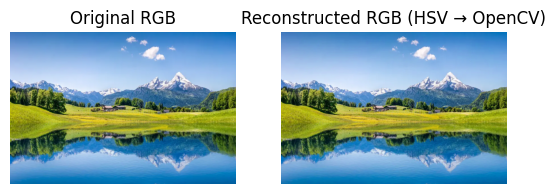

In [ ]:
import cv2
import matplotlib.pyplot as plt

# img_rgb should be your loaded RGB image (0–255)
hsv_custom = rgb_to_hsv(img_rgb)

# Convert back to RGB using OpenCV
rgb_reconstructed = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

plt.subplot(1,2,1)
plt.title("Original RGB")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Reconstructed RGB (HSV → OpenCV)")
plt.imshow(rgb_reconstructed)
plt.axis("off")

plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [6]:
path = "/content/drive/MyDrive/see.jpeg"
import base64

with open(path, "rb") as img_file:
    b64 = base64.b64encode(img_file.read()).decode()

print(b64[:200])

/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


(np.float64(-0.5), np.float64(2999.5), np.float64(1903.5), np.float64(-0.5))

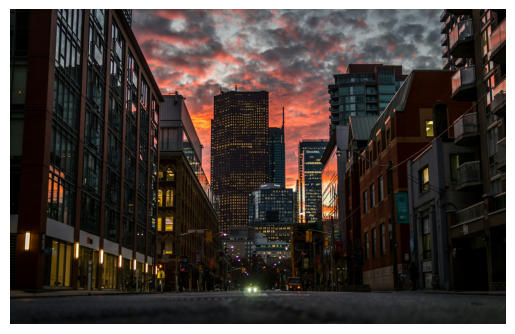

In [7]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = b64


img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

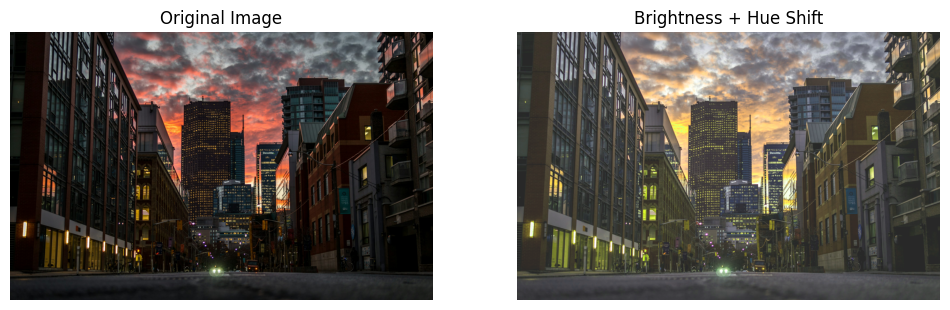

In [11]:
# Desire's Hues filter using brightness boost and hue shift

import numpy as np
import cv2
import matplotlib.pyplot as plt

# img_rgb should already exist from your earlier code
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR).astype(np.float32)

# 1. BRIGHTNESS BOOST  (add a value to all channels)
def increase_brightness(img, value=40):
    bright = img + value
    return np.clip(bright, 0, 255)


# 2. HUE SHIFT (rotate hue in HSV)

def shift_hue(img_bgr, shift_deg=25):
    # Convert to HSV
    hsv = cv2.cvtColor(img_bgr.astype(np.uint8), cv2.COLOR_BGR2HSV).astype(np.float32)

    # OpenCV hue range = 0–179 (not 0–360)
    shift = (shift_deg / 2.0)     # convert degrees to OpenCV units

    # Rotate hue
    hsv[:,:,0] = (hsv[:,:,0] + shift) % 180

    # Convert back to BGR
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)

# APPLY THE FILTERS

step1 = increase_brightness(img_bgr, value=40)   # boost brightness
step2 = shift_hue(step1, shift_deg=25)           # rotate hue by 25°
final_bgr = step2

# Convert back to RGB for display
final_rgb = cv2.cvtColor(final_bgr.astype(np.uint8), cv2.COLOR_BGR2RGB)


# DISPLAY RESULTS
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Brightness + Hue Shift")
plt.imshow(final_rgb)
plt.axis("off")

plt.show()


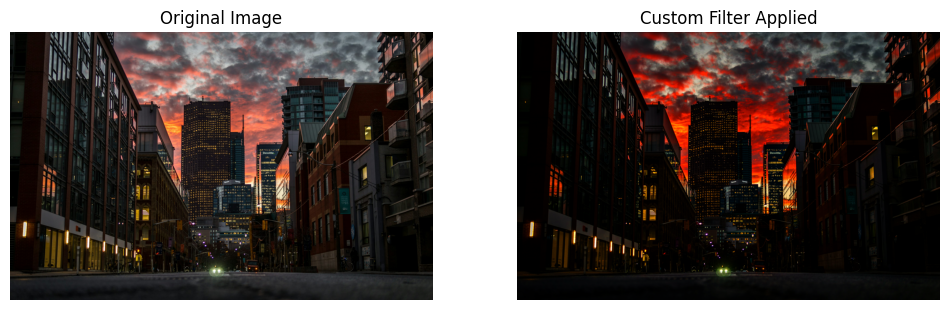

In [10]:
# 1. Savanna Sprint Filter - using gamma correcction, saturatiion boost and adding a warm tint

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assume img_rgb already exists from your previous code
# Convert RGB → BGR for cv2
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR).astype(np.float32)



# 1. GAMMA CORRECTION
def apply_gamma(img, gamma=0.6):
    inv = 1.0 / gamma
    img_norm = img / 255.0
    corrected = np.power(img_norm, inv)
    return np.clip(corrected * 255, 0, 255)


# 2. SATURATION BOOST (in HSV)
def boost_saturation(img_bgr, factor=1.4):
    hsv = cv2.cvtColor(img_bgr.astype(np.uint8), cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[:,:,1] *= factor
    hsv[:,:,1] = np.clip(hsv[:,:,1], 0, 255)
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)


# 3. WARM TINT (adds orange glow)

def warm_tint(img):
    R = img[:,:,2] * 1.08     # boost red
    B = img[:,:,0] * 0.92     # lower blue
    G = img[:,:,1]            # keep green

    tinted = img.copy()
    tinted[:,:,2] = np.clip(R, 0, 255)
    tinted[:,:,1] = np.clip(G, 0, 255)
    tinted[:,:,0] = np.clip(B, 0, 255)
    return tinted

# FINAL FILTER PIPELINE

step1 = apply_gamma(img_bgr, gamma=0.6)
step2 = boost_saturation(step1, factor=1.4)
final_img_bgr = warm_tint(step2)

# Convert back to RGB for plotting
final_img_rgb = cv2.cvtColor(final_img_bgr.astype(np.uint8), cv2.COLOR_BGR2RGB)

# DISPLAY RESULT

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Custom Filter Applied")
plt.imshow(final_img_rgb)
plt.axis("off")

plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
path = "/content/drive/MyDrive/see.jpeg"
import base64

with open(path, "rb") as img_file:
    b64 = base64.b64encode(img_file.read()).decode()

print(b64[:200])

/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


(np.float64(-0.5), np.float64(2999.5), np.float64(1903.5), np.float64(-0.5))

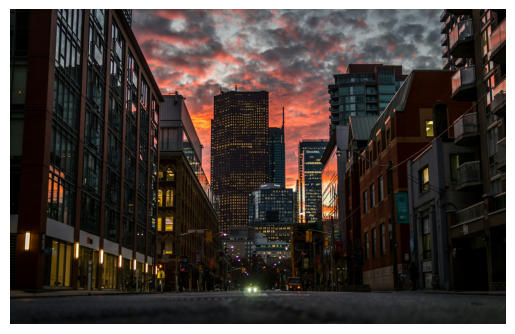

In [3]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = b64


img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

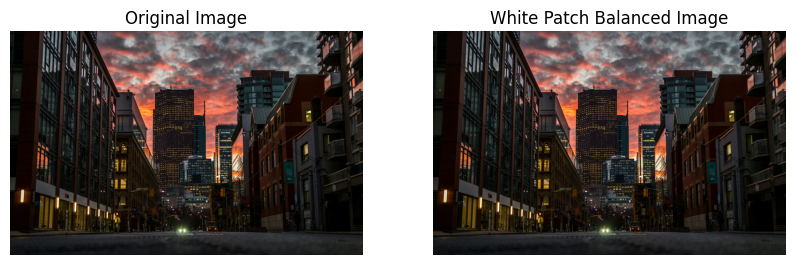

In [5]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Convert PIL image → NumPy RGB array
img_rgb = np.array(img)

# White Patch Balance function (NumPy-only)
def white_patch_balance(img_rgb):
    # Convert to float for safe scaling
    img_float = img_rgb.astype(np.float32)

    #  Find brightest pixel per channel (max value)
    max_R = np.max(img_float[:,:,0])
    max_G = np.max(img_float[:,:,1])
    max_B = np.max(img_float[:,:,2])

    #  Compute scale factors to bring max → 255
    scale_R = 255.0 / max_R
    scale_G = 255.0 / max_G
    scale_B = 255.0 / max_B

    #  Apply scaling to whole image
    balanced = img_float.copy()
    balanced[:,:,0] *= scale_R
    balanced[:,:,1] *= scale_G
    balanced[:,:,2] *= scale_B

    #  Clip & convert back to uint8
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    return balanced

#  Apply white patch correction ---
balanced_img = white_patch_balance(img_rgb)

# Display results ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("White Patch Balanced Image")
plt.imshow(balanced_img)
plt.axis("off")

plt.show()

# our image has bright clouds, bright lights, high dynamic range
# so There is no color cast to remove and White Patch won’t visibly change the image.

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

Enter slider value (0 to 1): 0.2


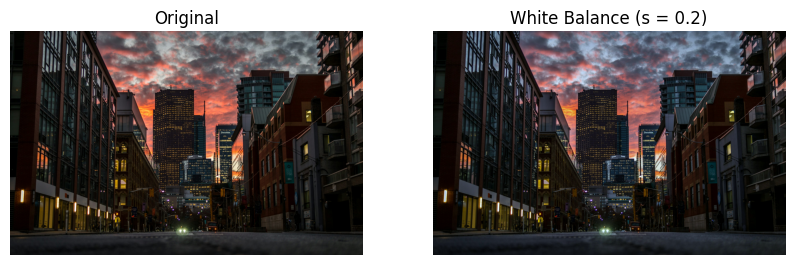

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def white_balance_slider(img_rgb, s):

    img = img_rgb.astype(np.float32)
    # Cold (more blue, less red)
    cold_mul = np.array([0.85, 1.00, 1.25])   # R, G, B multipliers

    # Warm (more red, less blue)
    warm_mul = np.array([1.25, 1.00, 0.85])

    # --- Compute blended multiplier depending on slider s ---
    if s <= 0.5:
        t = s / 0.5                      # maps 0→0.5 to 0→1
        sm = (1 - t) * cold_mul + t * np.array([1,1,1])
    else:
        t = (s - 0.5) / 0.5              # maps 0.5→1 to 0→1
        sm = (1 - t) * np.array([1,1,1]) + t * warm_mul

    # --- Apply multiplier to each channel ---
    balanced = img * sm

    # --- Clip and convert back ---
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    return balanced
s = float(input("Enter slider value (0 to 1): "))

balanced = white_balance_slider(img_rgb, s)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(balanced)
plt.title(f"White Balance (s = {s})")
plt.axis("off")

plt.show()
